In [28]:
# Import the necessary libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# evaluation and metrics
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset into a pandas DataFrame:

df = pd.read_csv('train.csv')

In [3]:
# Explore the dataset by inspecting the first few rows:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get an overview of the dataset, including the number of rows, columns, and data types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Generate descriptive statistics for numerical columns:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


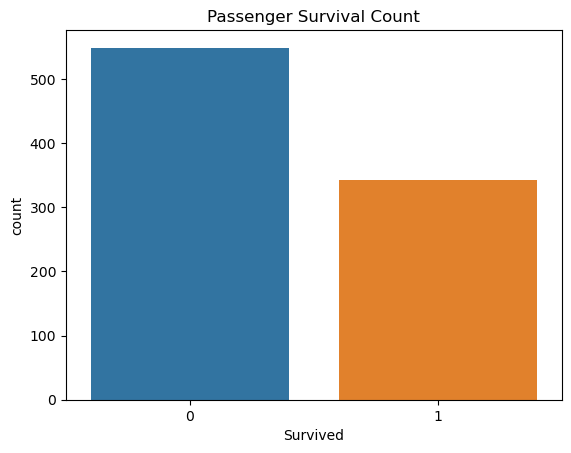

In [6]:
# Visualize the distribution of passengers by their survival status:

sns.countplot(x='Survived', data=df)
plt.title('Passenger Survival Count')
plt.show()

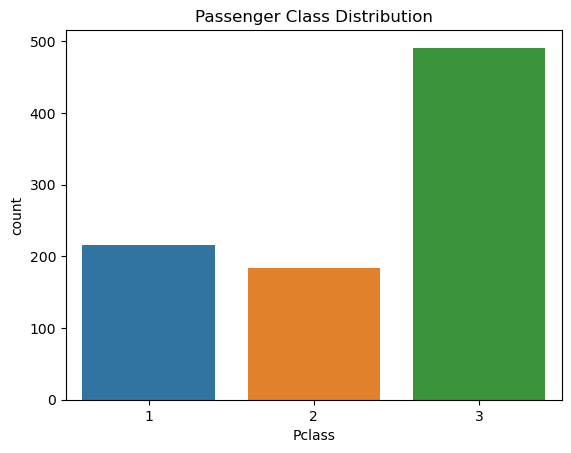

In [7]:
# Explore the distribution of passengers based on their class:

sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

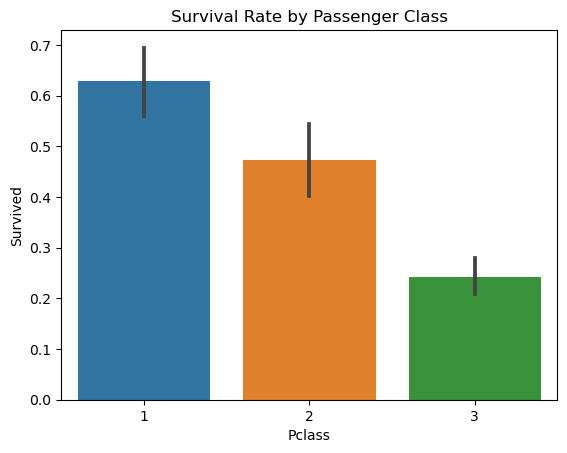

In [8]:
# Analyze the survival rate based on passenger class:

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

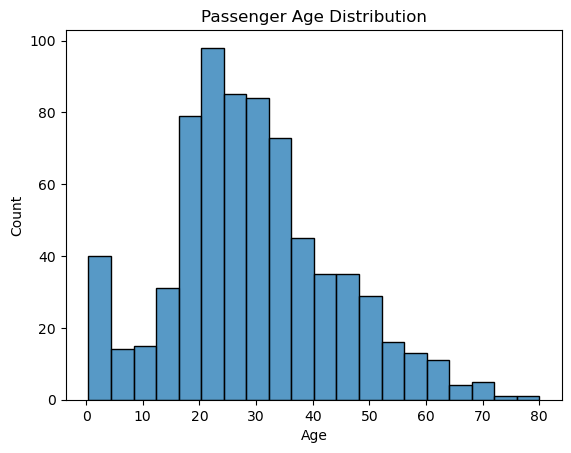

In [9]:
# Investigate the distribution of passengers' age:

sns.histplot(df['Age'].dropna(), bins=20)
plt.title('Passenger Age Distribution')
plt.show()

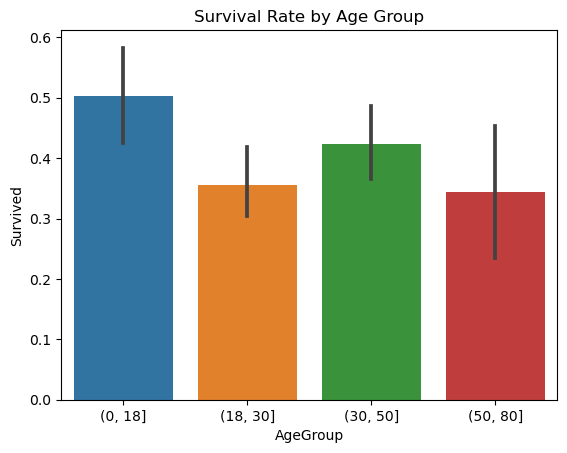

In [10]:
# Visualize the survival rate based on age group:

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 80])
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

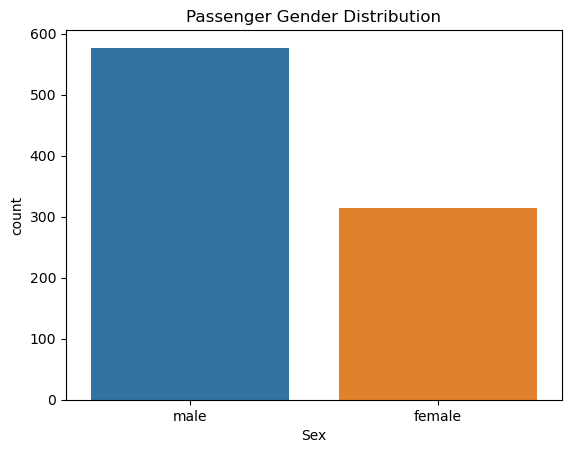

In [11]:
# Explore the gender distribution among passengers:

sns.countplot(x='Sex', data=df)
plt.title('Passenger Gender Distribution')
plt.show()

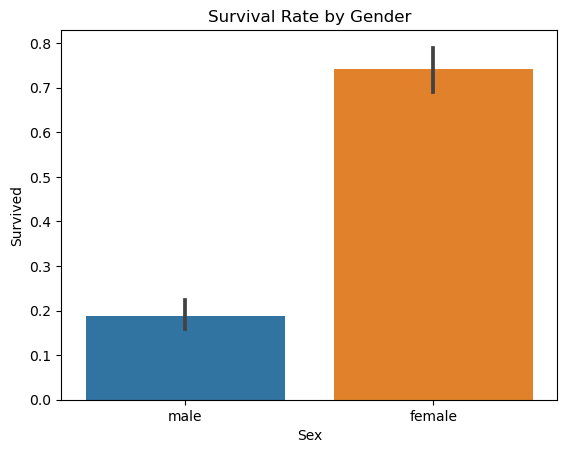

In [12]:
# Analyze the survival rate based on gender:

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

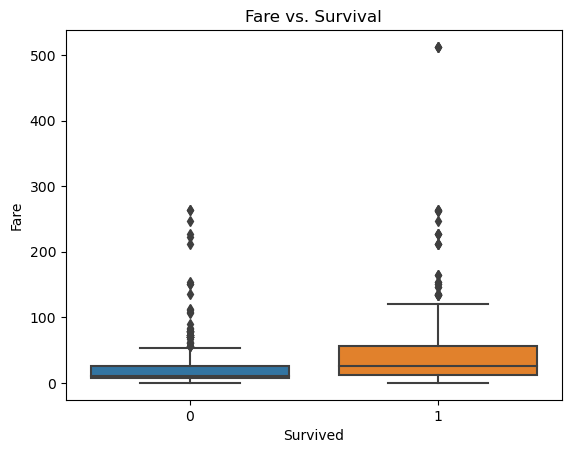

In [13]:
# Visualize the relationship between fare and survival rate:

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs. Survival')
plt.show()

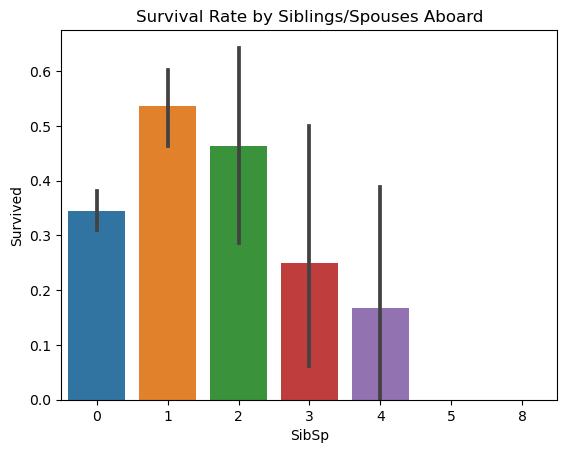

In [14]:
# Analyze the survival rate based on the number of siblings/spouses aboard:

sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by Siblings/Spouses Aboard')
plt.show()

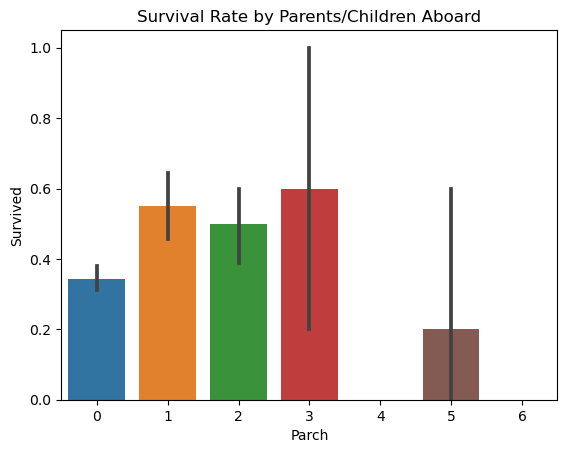

In [15]:
# Investigate the impact of having parents/children aboard on survival rate:

sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parents/Children Aboard')
plt.show()

In [16]:
# Remove irrelevant columns:

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [17]:
# Check for missing values
df.isnull().sum()

# Fill missing age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing fare value with the median fare
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Fill missing embarked values with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Create dummy variables for 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

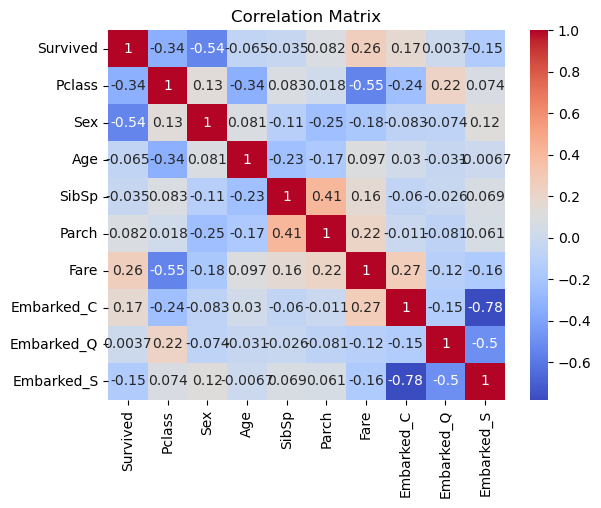

In [19]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Select relevant features based on correlation with the target variable 'Survived'
relevant_features = corr_matrix['Survived'].abs().sort_values(ascending=False).index

# Select the top k relevant features (e.g., top 5)
k = 5
selected_features = relevant_features[1:k+1]

# Create a new DataFrame with the selected features
df_selected = df[selected_features]

In [23]:
# Split the data into features (X) and target variable (y)
y = df['Survived']
X = df_selected

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Define a list of classifiers
classifiers = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(random_state=42),
    KNeighborsClassifier()
]

best_accuracy = 0.0
best_classifier = None

# Iterate through each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if the current model has a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = classifier

# Print the best classifier and its accuracy score
print("Best Classifier:", best_classifier)
print("Accuracy Score:", best_accuracy)

Best Classifier: GradientBoostingClassifier(random_state=42)
Accuracy Score: 0.8156424581005587


C:\Users\Jean\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
# Define the hyperparameter grid for the best classifier
param_grid = {
    'n_estimators': [10, 100, 200, 300, 400],
    'max_depth': [1, 2, 3, 4],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform GridSearchCV on the best classifier
grid_search = GridSearchCV(best_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
Best Score: 0.8146557667684429


In [38]:
# Load the test data
test = pd.read_csv('test.csv')

# Remove irrelevant columns
test_data = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical representation
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})

embarked_dummies = pd.get_dummies(test_data['Embarked'], prefix='Embarked')
test_data = pd.concat([test_data, embarked_dummies], axis=1)
test_data.drop('Embarked', axis=1, inplace=True)

# Perform feature selection
test_data_selected = test_data[selected_features]  # Assuming `selected_features` is already defined

# Make sure the test data has the same columns as the training data
test_data_selected = test_data_selected.reindex(columns=X_train.columns, fill_value=0)

# Now the test data is ready for prediction using the trained model

In [41]:
# Apply the best classifier with optimal hyperparameters to the preprocessed test data
predictions = grid_search.best_estimator_.predict(test_data_selected)

In [42]:
# Create a DataFrame with the passenger IDs and corresponding predictions
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

# Save the predictions to a CSV file
output.to_csv('predictions.csv', index=False)